# Scikit-Learn - Linear Model

https://scikit-learn.org/stable/modules/linear_model.html

The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the features. 

In mathematical notation, if $\hat{y}$ is the predicted value.

$$\hat{y} (w, x) = w_0 + w_1x_1 + ... + w_px_p$$

We use vector $w = (w_1, ..., w_p)$ as coef_ and $w_0$ as intercept_.

# Ordinary Least Squares

LinearRegression fits a linear model with coefficients $w = (w_1, ..., w_p)$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. 

Mathematically it solves a problem of the form:
    
$$\displaystyle\min_{w} || X_w - y ||_2^2$$

LinearRegression will take in its fit method arrays X, y and will store the coefficients w of the linear model in its coef_ member:

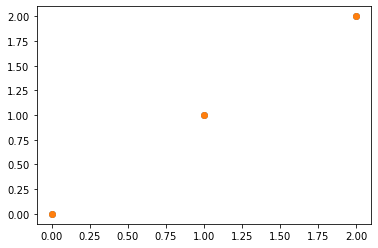

reg.coef_:
 [0.5 0.5]

reg.intercept_:
 2.220446049250313e-16


In [9]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
X = [[0, 0], [1, 1], [2, 2]]
y =[0, 1, 2]

import matplotlib.pyplot as plt
plt.plot (X, y, 'o')
plt.show()

#reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
reg.fit(X, y)
# LinearRegression()
print('reg.coef_:\n', reg.coef_)
print()

#array([0.5, 0.5])
print('reg.intercept_:\n', reg.intercept_)
# 2.220446049250313e-16


The coefficient estimates for Ordinary Least Squares rely on the independence of the features. 

When features are correlated and the columns of the design matrix X have an approximate linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed target, producing a large variance. 

This situation of multicollinearity can arise, for example, when data are collected without an experimental design.

## Ordinary Least Squares Complexity

The least squares solution is computed using the singular value decomposition of X. 

If X is a matrix of shape (n_samples, n_features) this method has a cost of 
$O(n_{sample} n_{features}^{2})$, assuming that 
$n_{samples} \geq n_{features}$.

# Ridge Regression and Classification

## Regression

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. 

The ridge coefficients minimize a penalized residual sum of squares:
    
$$\displaystyle\min_{w} || X_w - y ||_2^{2} + \alpha || w ||_2^{2} $$

The complexity parameter $\alpha \geq 0 $ controls the amount of shrinkage: the larger the value of \alpha, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

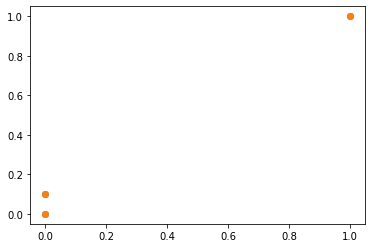

reg.coef_:
 [0.34545455 0.34545455]
reg.intercept_:
 0.1363636363636364


In [10]:
from sklearn import linear_model
X = [[0, 0], [0, 0], [1, 1]]
y = [0, .1, 1]

import matplotlib.pyplot as plt
plt.plot (X, y, 'o')
plt.show()

reg = linear_model.Ridge(alpha=.5)
# reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
reg.fit(X, y)
# Ridge(alpha=0.5)
print('reg.coef_:\n', reg.coef_)
#array([0.34545455, 0.34545455])
print('reg.intercept_:\n', reg.intercept_)
#0.13636...

## Ridge Classification

https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-regression
    
Ridge regression is a way to create a simplified model when the number of predictor variables in a set exceeds the number of observations, 
or when a data set has multi-collinearity (i.e., there are correlations between predictor variables)

The Ridge regressor has a classifier variant: RidgeClassifier. 
    
This classifier first converts binary targets to {-1, 1} and then treats the problem as a regression task, optimizing the same objective as above. 
    
The predicted class corresponds to the sign of the regressor’s prediction. 

For multiclass classification, the problem is treated as multi-output regression, and the predicted class corresponds to the output with the highest value.

It might seem questionable to use a (penalized) Least Squares loss to fit a classification model instead of the more traditional logistic or hinge losses. 

However in practice all those models can lead to similar cross-validation scores in terms of accuracy or precision/recall, while the penalized least squares loss used by the RidgeClassifier allows for a very different choice of the numerical solvers with distinct computational performance profiles.

The RidgeClassifier can be significantly faster than, e.g., LogisticRegression with a high number of classes, because it is able to compute the projection matrix 
$(X^{T} X)^{-1}X^{T}$ only once.

This classifier is sometimes referred to as a Least Squares Support Vector Machines with a linear kernel.

# Polynomial Regression (Extended Linear Models with Basis Functions)

One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. 

This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. 

In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$\hat{y} (w, x) = w_0 + w_1 x_1 + w_2 x_2$$

If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$\hat{y} (w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_{1}^{2} + w_5 x_{2}^{2}$$

We create a new set of features:
        
$$z = [x_1, x_2, x_1 x_2, x_{1}^{2}, x_{2}^{2}]$$

With this re-labeling of the data, our problem can be written:

$$\hat{y} (w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5 $$

We see that the resulting polynomial regression is in the same class of linear models we considered above (i.e., the model is linear in ) and can be solved by the same techniques. 

By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.



Here is an example of applying this idea to one-dimensional data, using polynomial features of varying degrees:

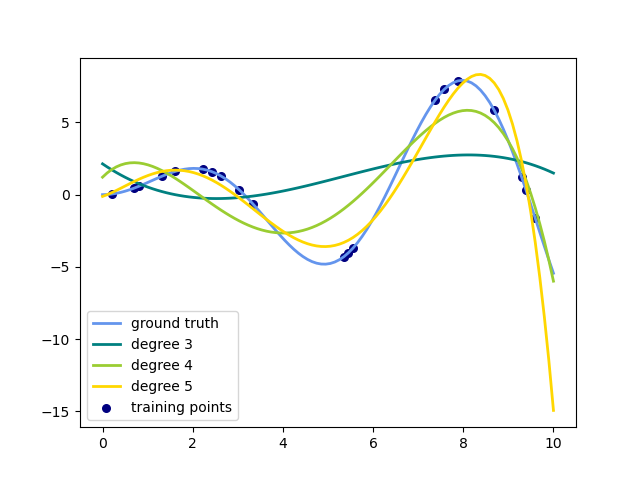

This figure is created using the PolynomialFeatures transformer, which transforms an input data matrix into a new data matrix of a given degree. It can be used as follows:

In [1]:
# Polynomial Linear Model
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.arange(6).reshape(3, 2)
print ('X:\n', X)
print()

#array([[0, 1],
#       [2, 3],
#       [4, 5]])
poly = PolynomialFeatures(degree=2)
print('poly.fit_transform(X):\n',poly.fit_transform(X))
print()
#array([[ 1.,  0.,  1.,  0.,  0.,  1.],
#       [ 1.,  2.,  3.,  4.,  6.,  9.],
#       [ 1.,  4.,  5., 16., 20., 25.]])

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3
model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_
print("model.named_steps['linear'].coef_:\n", model.named_steps['linear'].coef_)
# array([ 3., -2.,  1., -1.])

X:
 [[0 1]
 [2 3]
 [4 5]]

poly.fit_transform(X):
 [[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]

model.named_steps['linear'].coef_:
 [ 3. -2.  1. -1.]


The linear model trained on polynomial features is able to exactly recover the input polynomial coefficients.

In some cases it’s not necessary to include higher powers of any single feature, but only the so-called interaction features that multiply together at most d distinct features. 

These can be gotten from PolynomialFeatures with the setting interaction_only=True.

For example, when dealing with boolean features, $ x_i^{n} = x_i $ for all $ n $ and is therefore useless; but $ x_i x_j $ represents the conjunction of two booleans. 

This way, we can solve the XOR problem with a linear classifier.

And the classifier “predictions” are perfect:

In [12]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = X[:, 0] ^ X[:, 1]
print('y:\n', y)
print()
#array([0, 1, 1, 0])
X = PolynomialFeatures(interaction_only=True).fit_transform(X).astype(int)
print('X:\n', X)
print()
#array([[1, 0, 0, 0],
#       [1, 0, 1, 0],
#       [1, 1, 0, 0],
#       [1, 1, 1, 1]])

#clf = Perceptron(fit_intercept=False, max_iter=10, tol=None, shuffle=False).fit(X, y)
# FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. 
# If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None
# (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. 
# Specify tol to silence this warning.FutureWarning)
clf = Perceptron(fit_intercept=False, max_iter=50, tol=1e-3, shuffle=False).fit(X, y)

# And the classifier “predictions” are perfect:
print('clf.predict(X):\n', clf.predict(X))
print()
#array([0, 1, 1, 0])
print('clf.score(X, y):\n', clf.score(X, y))
#1.0

y:
 [0 1 1 0]

X:
 [[1 0 0 0]
 [1 0 1 0]
 [1 1 0 0]
 [1 1 1 1]]

clf.predict(X):
 [0 1 1 0]

clf.score(X, y):
 1.0


# Generalized Linear Regression

https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TweedieRegressor.html#sklearn.linear_model.TweedieRegressor

In [17]:
# https://scikit-learn.org/stable/modules/linear_model.html
# > pip install Tweedie
from sklearn.linear_model import TweedieRegressor

X = [[0, 0], [0, 1], [2, 2]]
y = [0, 1, 2]

import matplotlib.pyplot as plt
plt.plot (X, y, 'o')
plt.show()

reg = TweedieRegressor(power=1, alpha=0.5, link='log')

#reg.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2])
reg.fit(X, y)
#TweedieRegressor(alpha=0.5, link='log', power=1)
print('reg.coef_:\n', reg.coef_)
print()
# array([0.2463..., 0.4337...])
print ('reg.intercept_:\n', reg.intercept_)
# -0.7638...

ImportError: cannot import name 'TweedieRegressor' from 'sklearn.linear_model' (C:\Users\14088\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\__init__.py)

# Bayesian Ridge Regression

https://en.wikipedia.org/wiki/Bayesian_linear_regression

In statistics, Bayesian linear regression is an approach to linear regression in which the statistical analysis is undertaken within the context of Bayesian inference. 

When the regression model has errors that have a normal distribution, and if a particular form of ***prior distribution*** is assumed, explicit results are available for the posterior probability distributions of the model's parameters.

https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html
    
Computes a Bayesian Ridge Regression on a synthetic dataset.

Compared to the OLS (ordinary least squares) estimator, the coefficient weights are slightly shifted toward zeros, which stabilises them.


__doc__: Automatically created module for IPython interactive environment

X[:2]
[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
   0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
   0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
   0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
   2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
   0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
   1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
  -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
  -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
  -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
  -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
  -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
   1.13940068 -1.23482582  0.40

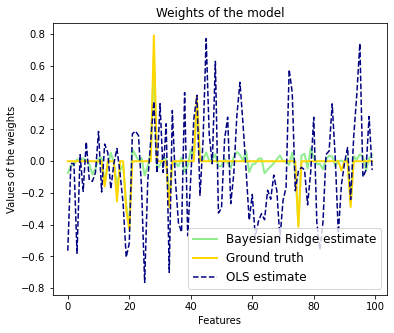

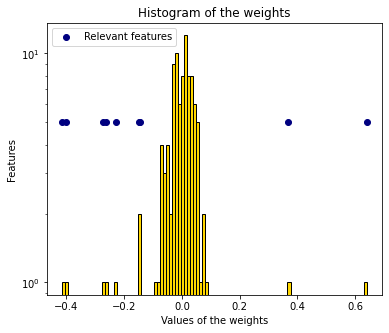

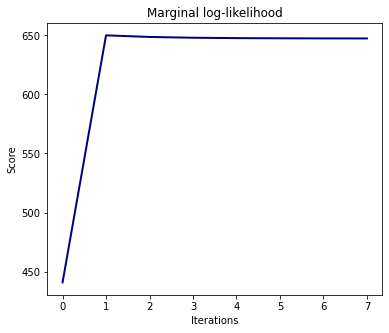

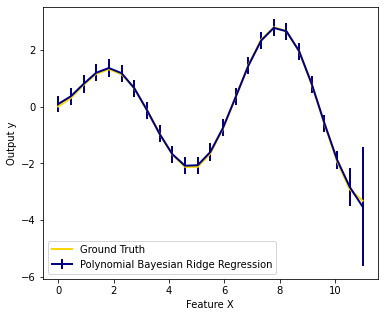

In [3]:
print('__doc__:', __doc__)
print()

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

# #############################################################################
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
print('X[:2]')
print(X[:2])
print()
# Create weights with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise
print ('y[:2]')
print(y[:2])
# #############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")


# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()